In [12]:
import pandas as pd

In [13]:
df = pd.read_csv('Data/fruits_train.csv')

In [14]:
df

,vitamin A %,vitamin C %,calcium %,iron %,magnesium %,calories (per 100g),potassium (mg),protein (g),fiber (g),classification
0,1.0,7.0,0.0,0.0,1.0,52.0,107.0,0.3,2.4,fruit
1,38.0,16.0,1.0,2.0,2.0,48.0,259.0,1.4,2.0,fruit
2,2.0,16.0,1.0,3.0,7.0,160.0,485.0,2.0,7.0,fruit
3,1.0,14.0,0.0,1.0,6.0,89.0,358.0,1.1,2.6,fruit
4,0.0,8.0,1.0,1.0,5.0,43.0,325.0,1.6,2.8,vegetable
5,4.0,35.0,2.0,3.0,5.0,43.0,163.0,1.4,5.0,fruit
6,1.0,16.0,0.0,1.0,1.0,57.0,77.0,0.7,2.4,fruit
7,12.0,148.0,4.0,3.0,5.0,34.0,316.0,2.8,2.6,vegetable
8,15.0,141.0,4.0,7.0,5.0,43.0,389.0,3.4,3.8,vegetable
9,334.0,9.0,3.0,1.0,3.0,41.0,320.0,0.9,2.8,vegetable


In [15]:
df_y = df['classification']
df_x = df.iloc[:, :-1]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size=0.3, random_state=155) 

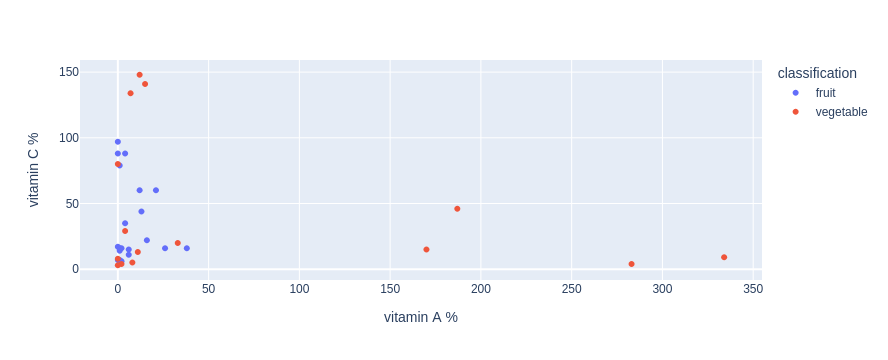

In [18]:
import plotly.express as px
px.scatter(df, x="vitamin A %", y="vitamin C %", color="classification")

In [19]:
from sklearn.tree import DecisionTreeClassifier


In [20]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(df_train_x, df_train_y)

DecisionTreeClassifier(criterion='entropy')

In [23]:
df_pred_y = clf.predict(df_test_x)
df_pred_y

array(['vegetable', 'fruit', 'vegetable', 'fruit', 'fruit', 'vegetable',
       'fruit', 'vegetable', 'fruit', 'fruit', 'vegetable'], dtype=object)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(df_test_y, df_pred_y)

0.6363636363636364

In [26]:
accuracy_score(df_train_y, clf.predict(df_train_x))

1.0

In [27]:
df_high_calorie = df[df['calories (per 100g)'] > 50]
df_low_calorie = df[df['calories (per 100g)'] <= 50]

In [32]:
df_high_calorie_y = df_high_calorie['classification']
df_high_calorie_x = df_high_calorie.iloc[:, :-1]
accuracy_score(df_high_calorie_y, clf.predict(df_high_calorie_x))

0.9166666666666666

In [38]:
df_low_calorie_y = df_low_calorie['classification']
df_low_calorie_x = df_low_calorie.iloc[:, :-1]
accuracy_score(df_low_calorie_y, clf.predict(df_low_calorie_x))

0.8695652173913043

In [39]:
df_new = pd.read_csv('Data/fruits_test.csv')
df_new

,vitamin A %,vitamin C %,calcium %,iron %,magnesium %,calories (per 100g),potassium (mg),protein (g),fiber (g)
0,1.0,154.0,3.0,1.0,4.0,61.0,213.0,1.1,3.0
1,15.0,300.0,2.0,11.0,3.0,20.0,202.0,2.2,2.1
2,0.0,43.0,2.0,3.0,5.0,53.0,151.0,1.1,7.0


In [40]:
clf.predict(df_new)

array(['fruit', 'vegetable', 'fruit'], dtype=object)